<a href="https://colab.research.google.com/github/SAKSHIDHYANI/Netflix-Movies-and-Tv-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.shape

(7787, 12)

In [ ]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
data['director'].fillna("Not known", inplace=True)
data['cast'].fillna("Not known", inplace=True)
data['country'].fillna("Not known", inplace=True)
data['rating'].fillna("Not known", inplace=True)
data.dropna(subset=['date_added'],inplace=True)

In [ ]:
data.shape

(7777, 12)

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.drop(['show_id'],axis=1,inplace=True)

In [ ]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
netflix_data = data.copy()

In [ ]:

netflix_data['date_added_year'] =  netflix_data.apply(lambda row: int(row.date_added[-4:]),axis=1)


In [ ]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [ ]:
netflix_data['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [ ]:
netflix_data['date_added_year'].value_counts()

2019    2153
2020    2009
2018    1685
2017    1225
2016     443
2021     117
2015      88
2014      25
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: date_added_year, dtype: int64

In [ ]:
netflix_data['country'].value_counts()

United States                                                   2549
India                                                            923
Not known                                                        506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [ ]:
'''netflix_data['listed_in'] = netflix_data.apply(lambda row: row.listed_in.split(','),axis=1)'''

"netflix_data['listed_in'] = netflix_data.apply(lambda row: row.listed_in.split(','),axis=1)"

In [ ]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

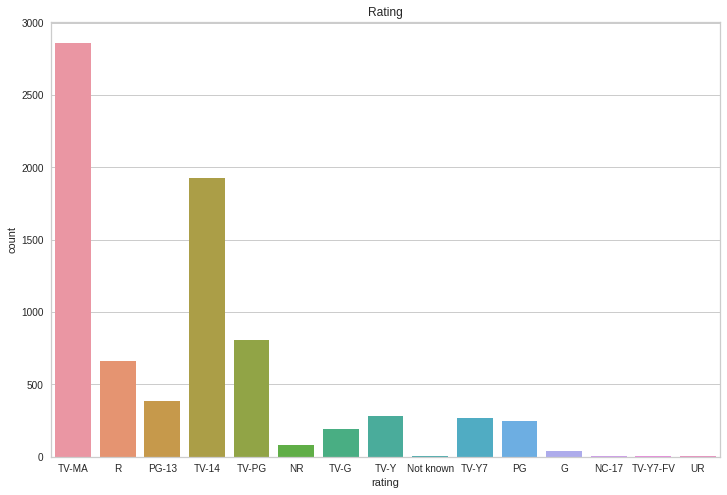

In [ ]:
sns.countplot(netflix_data['rating'])
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Rating')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Content Type')

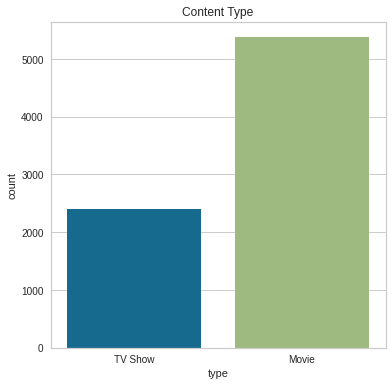

In [ ]:
sns.countplot(netflix_data['type'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Content Type')

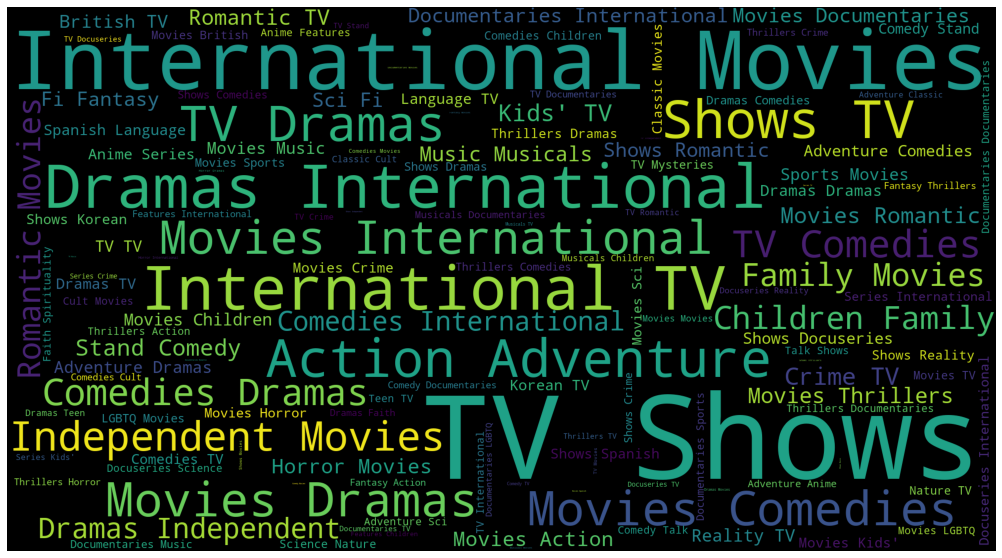

In [ ]:
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix_data[netflix_data['listed_in']!='Not known'].listed_in))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

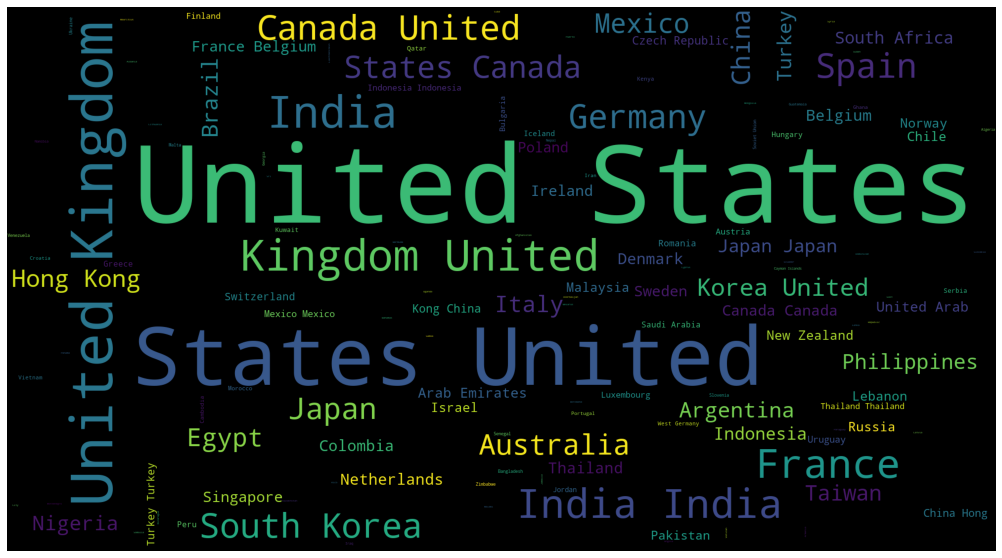

In [ ]:
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color='black', width=2000,height=1100).generate(" ".join(netflix_data[netflix_data['country']!='Not known'].country))                    
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
netflix_data['listed_in'].value_counts().index.values
all_genres = ""
for i in netflix_data['listed_in'].value_counts().index.values:
  all_genres  = all_genres + "," + i
all_genres = all_genres.split(',')
genres = [s.strip() for s in all_genres]
genres = np.unique(genres)
genres = list(genres)
print("Combined unique Genres' List : \n ")
genres.pop(0)
genres


Combined unique Genres' List : 
 


['Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers']

In [ ]:

netflix_data['Action & Adventure'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Action & Adventure' in x  else 0)
netflix_data['Anime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Anime' in x  else 0)
netflix_data['Children & Family'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Children & Family' in x  else 0)
netflix_data['Classic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Classic' in x  else 0)
netflix_data['Comedy'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Comedy' in x or 'Comedies' in x else 0)
netflix_data['Crime'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Crime' in x  else 0)
netflix_data['Documentaries'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Documentaries' in x  else 0)
netflix_data['Horror'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Horror' in x  else 0)
netflix_data['Romantic'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Romantic' in x  else 0)
netflix_data['Science'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Sci-Fi' in x or 'Science' in x else 0)
netflix_data['Thriller'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Thriller' in x  else 0)
netflix_data['Drama'] = netflix_data['listed_in'].apply(lambda x: 1 if 'Drama' in x  else 0)

In [ ]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,0,0,0,0,0,0,0,0,1,0,1
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,0,0,0,0,0,0,0,0,0,0,1
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0,0,0,0,0,0,0,1,0,0,0,0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,0,0,0,1,0,0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print("Anime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Anime'].sum())
print("Science category wise Movie and Tv show count",netflix_data.groupby(['type'])['Science'].sum())
print("Action & Adventure category wise Movie and Tv show count",netflix_data.groupby(['type'])['Action & Adventure'].sum())
print("Children & Family category wise Movie and Tv show count",netflix_data.groupby(['type'])['Children & Family'].sum())
print("Classic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Classic'].sum())
print("Comedy category wise Movie and Tv show count",netflix_data.groupby(['type'])['Comedy'].sum())
print("Crime category wise Movie and Tv show count",netflix_data.groupby(['type'])['Crime'].sum())
print("Horror category wise Movie and Tv show count",netflix_data.groupby(['type'])['Horror'].sum())
print("Documentaries' category wise Movie and Tv show count",netflix_data.groupby(['type'])['Documentaries'].sum())
print("Romantic category wise Movie and Tv show count",netflix_data.groupby(['type'])['Romantic'].sum())
print("Thriller category wise Movie and Tv show count",netflix_data.groupby(['type'])['Thriller'].sum())
print("Drama category wise Movie and Tv show count",netflix_data.groupby(['type'])['Drama'].sum())

Anime category wise Movie and Tv show count type
Movie       57
TV Show    147
Name: Anime, dtype: int64
Science category wise Movie and Tv show count type
Movie      218
TV Show    160
Name: Science, dtype: int64
Action & Adventure category wise Movie and Tv show count type
Movie      721
TV Show    149
Name: Action & Adventure, dtype: int64
Children & Family category wise Movie and Tv show count type
Movie      532
TV Show      0
Name: Children & Family, dtype: int64
Classic category wise Movie and Tv show count type
Movie      103
TV Show     25
Name: Classic, dtype: int64
Comedy category wise Movie and Tv show count type
Movie      1800
TV Show     537
Name: Comedy, dtype: int64
Crime category wise Movie and Tv show count type
Movie        0
TV Show    426
Name: Crime, dtype: int64
Horror category wise Movie and Tv show count type
Movie      312
TV Show     69
Name: Horror, dtype: int64
Documentaries' category wise Movie and Tv show count type
Movie      786
TV Show      0
Name: Do

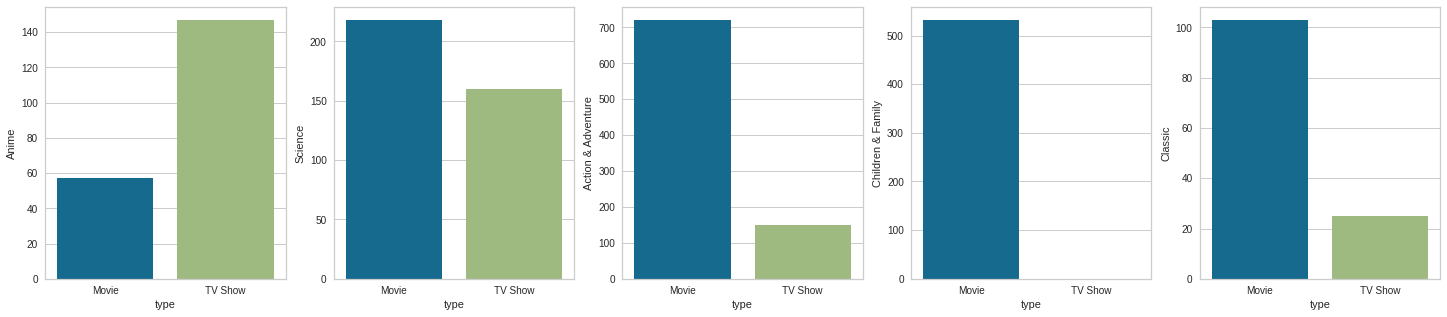

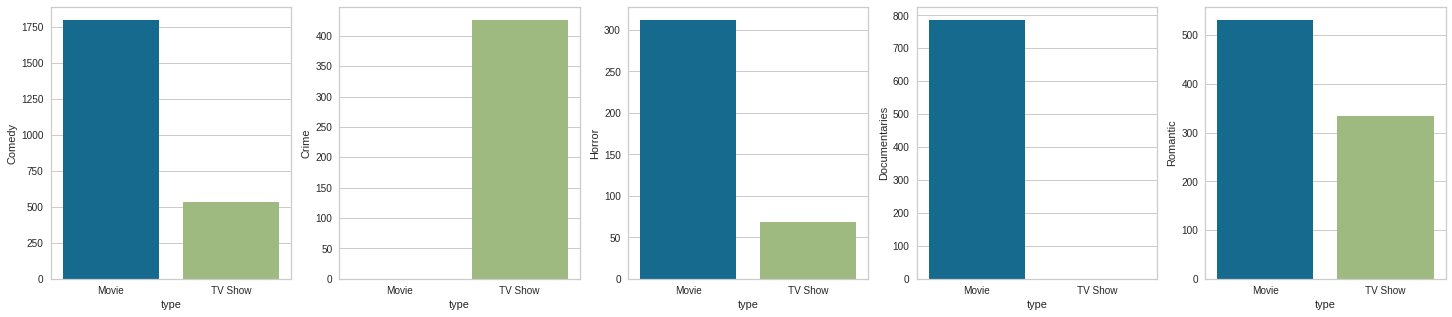

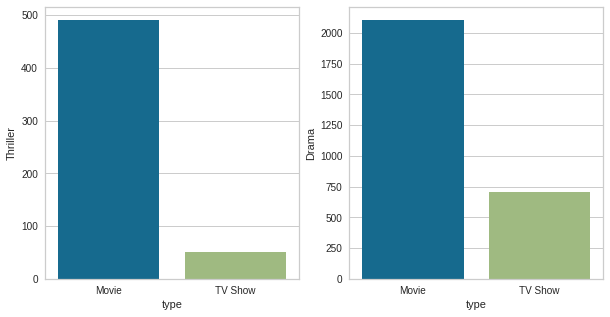

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(25,5))
df1 =pd.DataFrame(netflix_data.groupby('type')['Anime'].sum()).reset_index()
sns.barplot(x='type',y= 'Anime',data=df1,ax=ax[0])
df2 =pd.DataFrame(netflix_data.groupby('type')['Science'].sum()).reset_index()
sns.barplot(x='type',y= 'Science',data=df2,ax=ax[1])
df3 =pd.DataFrame(netflix_data.groupby('type')['Action & Adventure'].sum()).reset_index()
sns.barplot(x='type',y= 'Action & Adventure',data=df3,ax=ax[2])
df4 =pd.DataFrame(netflix_data.groupby('type')['Children & Family'].sum()).reset_index()
sns.barplot(x='type',y= 'Children & Family',data=df4,ax=ax[3])
df5 =pd.DataFrame(netflix_data.groupby('type')['Classic'].sum()).reset_index()
sns.barplot(x='type',y= 'Classic',data=df5,ax=ax[4])

fig, axs = plt.subplots(1,5, figsize=(25,5))
df6 =pd.DataFrame(netflix_data.groupby('type')['Comedy'].sum()).reset_index()
sns.barplot(x='type',y= 'Comedy',data=df6,ax=axs[0])
df7 =pd.DataFrame(netflix_data.groupby('type')['Crime'].sum()).reset_index()
sns.barplot(x='type',y= 'Crime',data=df7,ax=axs[1])
df8 =pd.DataFrame(netflix_data.groupby('type')['Horror'].sum()).reset_index()
sns.barplot(x='type',y= 'Horror',data=df8,ax=axs[2])
df9 =pd.DataFrame(netflix_data.groupby('type')['Documentaries'].sum()).reset_index()
sns.barplot(x='type',y= 'Documentaries',data=df9,ax=axs[3])
df10 =pd.DataFrame(netflix_data.groupby('type')['Romantic'].sum()).reset_index()
sns.barplot(x='type',y= 'Romantic',data=df10,ax=axs[4])

fig, axs = plt.subplots(1,2, figsize=(10,5))
df11 =pd.DataFrame(netflix_data.groupby('type')['Thriller'].sum()).reset_index()
sns.barplot(x='type',y= 'Thriller',data=df11,ax=axs[0])
df12 =pd.DataFrame(netflix_data.groupby('type')['Drama'].sum()).reset_index()
sns.barplot(x='type',y= 'Drama',data=df12,ax=axs[1])

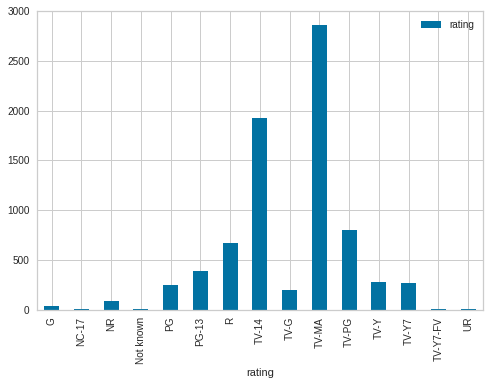

In [ ]:
netflix_data.groupby('rating')['rating'].count().plot(kind='bar',legend=True)

In [ ]:
netflix_data['Season_wise_content'] = netflix_data['duration'].apply(lambda x: 'yes' if 'Season' in x else 'no')

In [ ]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama,Season_wise_content
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,0,0,0,0,0,0,0,0,1,0,1,yes
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,0,0,0,0,0,0,0,0,0,0,1,no
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0,0,0,0,0,0,0,1,0,0,0,0,no
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,0,0,0,1,0,0,no
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,0,0,0,0,0,0,0,0,0,0,0,1,no


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def column_values(netflix_data):
  netflix_data['country'].value_counts().index.values
  all_countries = ""
  for i in netflix_data['country'].value_counts().index.values:
    all_countries  = all_countries + "," + i
  all_countries = all_countries.split(',')
  countries = [s.strip() for s in all_countries]
  countries = np.unique(countries)
  countries = list(countries)

  countries.pop(0)
  return countries


In [ ]:
movie_countries = column_values(netflix_data[netflix_data['type']== "Movie"])
print("Total no of countries in dataset for content type as movies: ",len(movie_countries))
print("unique country list for Movie content type : \n ")
print(movie_countries)

Total no of countries in dataset for content type as movies:  111
unique country list for Movie content type : 
 
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Belgium', 'Bermuda', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Not known', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Po

In [ ]:
tv_show_countries = column_values(netflix_data[netflix_data['type']== "TV Show"])
print("Total no of countries in dataset for content type as Tv shows:\n \n ",len(tv_show_countries))
print("unique country list for Movie content type : \n ")
print(tv_show_countries)

Total no of countries in dataset for content type as Tv shows:
 
  66
unique country list for Movie content type : 
 
['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Lebanon', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Not known', 'Pakistan', 'Philippines', 'Poland', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Senegal', 'Singapore', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'West Germany']


In [ ]:
print("Common countries for Tv shows and movie content both:")
print(len(list(set(movie_countries).intersection(tv_show_countries))),'countries \n \n',list(set(movie_countries).intersection(tv_show_countries)))

Common countries for Tv shows and movie content both:
59 countries 
 
 ['Netherlands', 'United States', 'South Africa', 'Japan', 'Malta', 'Ireland', 'Uruguay', 'Germany', 'Finland', 'Saudi Arabia', 'Sweden', 'Taiwan', 'Israel', 'Luxembourg', 'Not known', 'Philippines', 'Czech Republic', 'Nigeria', 'Croatia', 'France', 'Malaysia', 'Switzerland', 'West Germany', 'Poland', 'Canada', 'Greece', 'New Zealand', 'Chile', 'Brazil', 'Hong Kong', 'Norway', 'Denmark', 'Thailand', 'Austria', 'Jordan', 'Pakistan', 'Russia', 'Spain', 'United Arab Emirates', 'Hungary', 'Ukraine', 'Mexico', 'Singapore', 'Lebanon', 'Indonesia', 'Colombia', 'South Korea', 'India', 'Turkey', 'Egypt', 'Argentina', 'Senegal', 'Australia', 'China', 'Belgium', 'Iceland', 'Italy', 'United Kingdom', 'Kuwait']


In [ ]:
onlymovie_countries = [x for x in movie_countries if x not in tv_show_countries]
print("No of countries with only movie type content ",len(onlymovie_countries))
print("List of countries with movie type content only \n",onlymovie_countries)

No of countries with only movie type content  52
List of countries with movie type content only 
 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda', 'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Dominican Republic', 'East Germany', 'Ecuador', 'Georgia', 'Ghana', 'Guatemala', 'Iran', 'Iraq', 'Jamaica', 'Kazakhstan', 'Kenya', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malawi', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Qatar', 'Romania', 'Samoa', 'Serbia', 'Slovakia', 'Slovenia', 'Somalia', 'Soviet Union', 'Sri Lanka', 'Sudan', 'Uganda', 'Vatican City', 'Venezuela', 'Vietnam', 'Zimbabwe']


In [ ]:
onlytvshow_countries = [x for x in tv_show_countries if x not in movie_countries]
print("No of countries with only Tv show type content",len(onlytvshow_countries))
print("List of countries with TV show type content only \n",onlytvshow_countries)

No of countries with only Tv show type content 7
List of countries with TV show type content only 
 ['Azerbaijan', 'Belarus', 'Cuba', 'Cyprus', 'Mauritius', 'Puerto Rico', 'Syria']


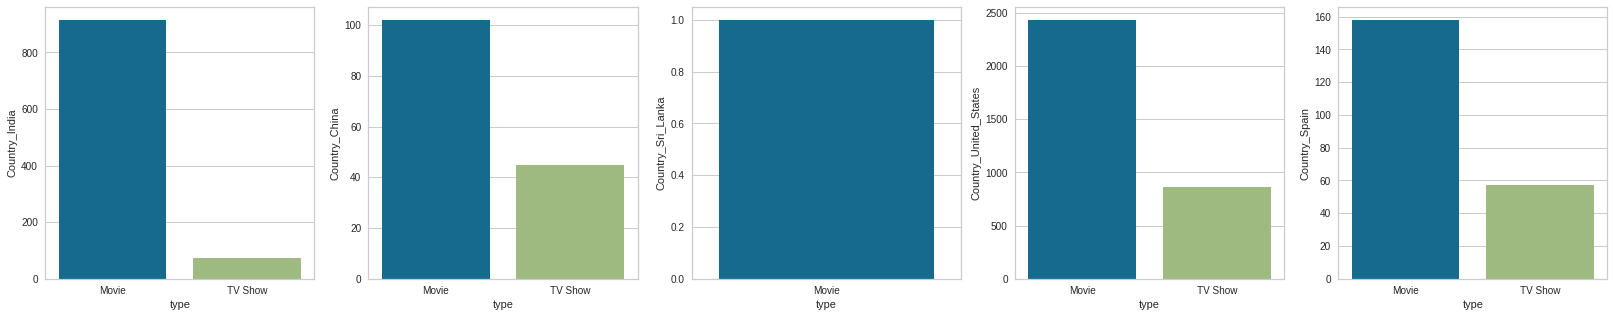

In [ ]:


fig, ax = plt.subplots(1,5, figsize=(28,5))
indian_content = netflix_data[netflix_data['country'].str.contains('India')]
indian_content =pd.DataFrame(indian_content.groupby('type')['country'].count()).reset_index()
indian_content.rename(columns ={'country':'Country_India'},inplace =True)
sns.barplot(x='type',y= 'Country_India',data=indian_content,ax=ax[0])

China_content = netflix_data[netflix_data['country'].str.contains('China')]
China_content =pd.DataFrame(China_content.groupby('type')['country'].count()).reset_index()
China_content.rename(columns ={'country':'Country_China'},inplace =True)
sns.barplot(x='type',y= 'Country_China',data=China_content,ax=ax[1])

SriLanka_content = netflix_data[netflix_data['country'].str.contains('Sri Lanka')]
SriLanka_content =pd.DataFrame(SriLanka_content.groupby('type')['country'].count()).reset_index()
SriLanka_content.rename(columns ={'country':'Country_Sri_Lanka'},inplace =True)
sns.barplot(x='type',y= 'Country_Sri_Lanka',data=SriLanka_content,ax=ax[2])

United_States_content = netflix_data[netflix_data['country'].str.contains('United States')]
United_States_content =pd.DataFrame(United_States_content.groupby('type')['country'].count()).reset_index()
United_States_content.rename(columns ={'country':'Country_United_States'},inplace =True)
sns.barplot(x='type',y= 'Country_United_States',data=United_States_content,ax=ax[3])

Spain_content = netflix_data[netflix_data['country'].str.contains('Spain')]
Spain_content =pd.DataFrame(Spain_content.groupby('type')['country'].count()).reset_index()
Spain_content.rename(columns ={'country':'Country_Spain'},inplace =True)
sns.barplot(x='type',y= 'Country_Spain',data=Spain_content,ax=ax[4])



In [ ]:
netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,Action & Adventure,Anime,Children & Family,Classic,Comedy,Crime,Documentaries,Horror,Romantic,Science,Thriller,Drama,Season_wise_content
0,TV Show,3%,Not known,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,0,0,0,0,0,0,0,0,0,1,0,1,yes
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,0,0,0,0,0,0,0,0,0,0,1,no
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0,0,0,0,0,0,0,1,0,0,0,0,no
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,1,0,0,0,0,0,0,0,0,1,0,0,no
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,0,0,0,0,0,0,0,0,0,0,0,1,no


In [ ]:
new_df = pd.DataFrame(netflix_data.groupby(['date_added_year','type'])['type'].count())
new_df.rename(columns={'date_added_year':'count of movies and tv shows','type':'content_type_count'},inplace=True)
new_df.reset_index()

,date_added_year,type,content_type_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,6


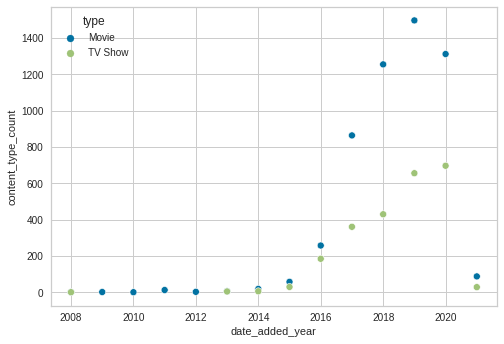

In [ ]:
sns.scatterplot(x='date_added_year', y='content_type_count', data=new_df, hue='type')

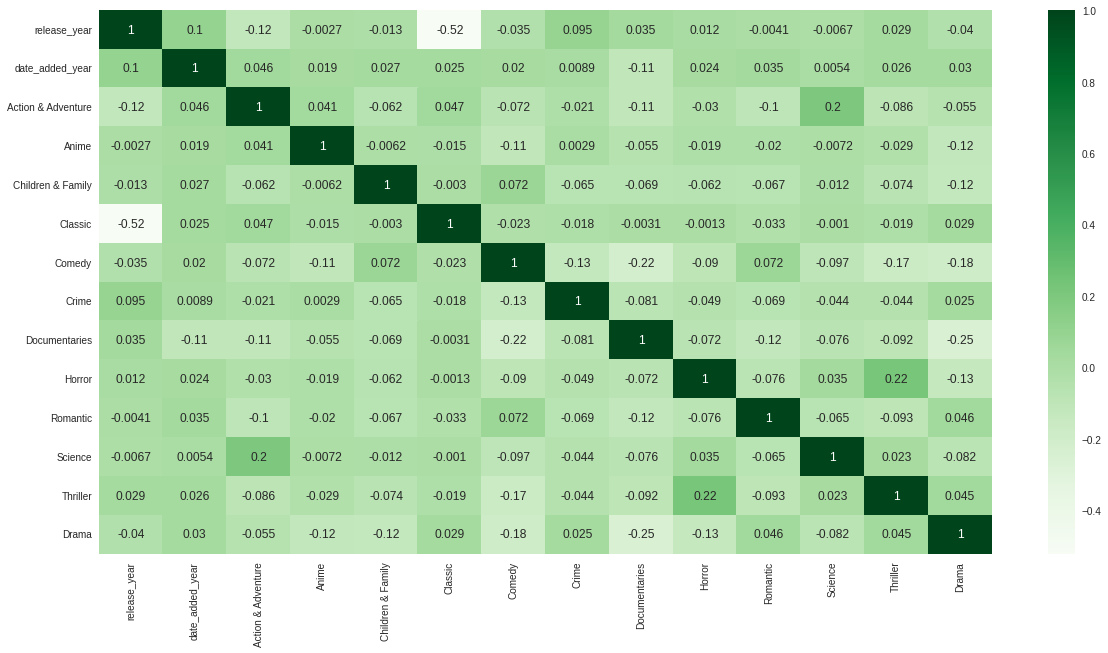

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(netflix_data.corr(), annot=True,cmap="Greens")

In [ ]:
netflix_data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'Action & Adventure', 'Anime', 'Children & Family',
       'Classic', 'Comedy', 'Crime', 'Documentaries', 'Horror', 'Romantic',
       'Science', 'Thriller', 'Drama', 'Season_wise_content'],
      dtype='object')

In [ ]:
converted_data = netflix_data.copy()
converted_data.head()
label_encoder = LabelEncoder()
converted_data['type'] = label_encoder.fit_transform(converted_data['type'])
converted_data.drop(['title','cast','date_added','duration','description','Action & Adventure', 'Anime', 'Children & Family',
       'Classic', 'Comedy', 'Crime', 'Documentaries', 'Horror', 'Romantic',
       'Science', 'Thriller', 'Drama','Season_wise_content',],axis=1,inplace=True)
converted_data['listed_in'] = label_encoder.fit_transform(converted_data['listed_in'])
converted_data['director'] = label_encoder.fit_transform(converted_data['director'])
converted_data['country'] = label_encoder.fit_transform(converted_data['country'])
converted_data['rating'] = label_encoder.fit_transform(converted_data['rating'])

In [ ]:
converted_data.head()

,type,director,country,release_year,rating,listed_in,date_added_year
0,1,2732,39,2020,9,397,2020
1,0,1840,308,2016,9,309,2016
2,0,1289,380,2011,6,335,2018
3,0,3446,550,2009,5,47,2017
4,0,3177,550,2008,5,293,2020


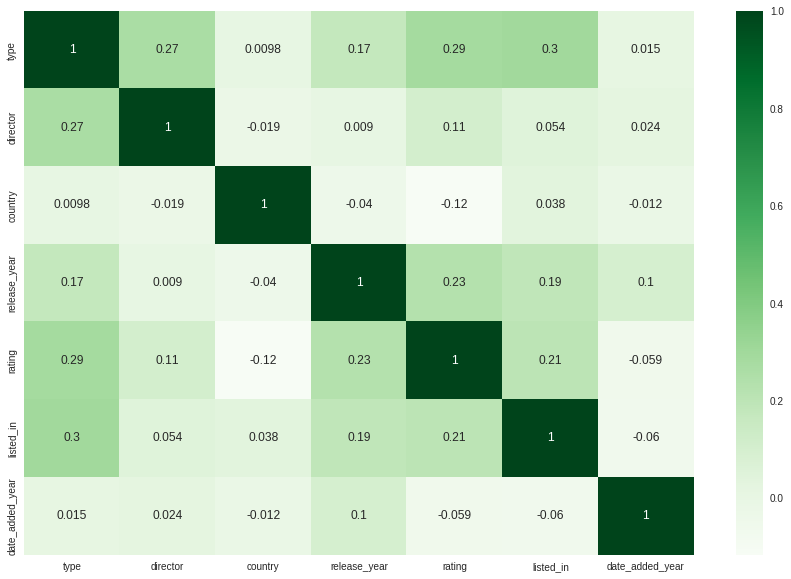

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(converted_data.corr(), annot=True,cmap="Greens")

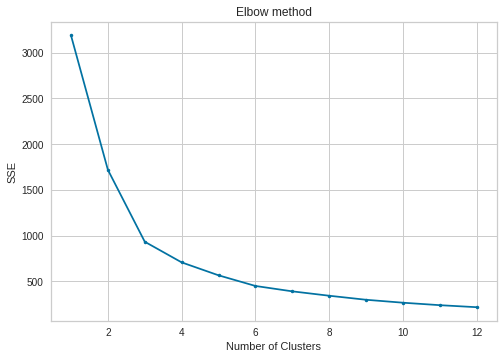

In [ ]:

Clus_dataSet = StandardScaler().fit_transform(converted_data)
Clus_dataSet = normalize(Clus_dataSet)
pca=PCA(n_components=2)
netflix_pca=pd.DataFrame(pca.fit_transform(Clus_dataSet)) 
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(netflix_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 13), sse,'.-')
plt.grid(b=True)
#plt.xticks(range(1, 11))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
def silhouette_score_analysis(n):

  for n_clusters in range(2,n+1):
      km = KMeans (n_clusters=n_clusters, random_state=42)
      preds = km.fit_predict(netflix_pca)
      centers = km.cluster_centers_
      


      score = silhouette_score(netflix_pca, preds)
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(netflix_pca) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

def clusters(n_cluster1,n_cluster2):
  pca=PCA(n_components=2)
  netflix_pca=pd.DataFrame(pca.fit_transform(Clus_dataSet))
  km = KMeans (n_clusters=n_cluster1, random_state=42)
  preds = km.fit_predict(netflix_pca)
  labels= km.predict(netflix_pca)
  
  colors = cm.nipy_spectral(labels.astype(float) / n_cluster1)
  fig, ax = plt.subplots(1,2, figsize=(10,5))
  
  ax[0].scatter(netflix_pca[0], netflix_pca[1], c=colors)
  ax[0].set_title("Clustered data for n clusters :"+str(n_cluster1))
  ax[0].set_xlabel("PCA component 1")
  ax[0].set_ylabel("PCA component 2")
  

  km = KMeans (n_clusters=n_cluster2, random_state=42)
  preds = km.fit_predict(netflix_pca)
  labels= km.predict(netflix_pca)
  colors = cm.nipy_spectral(labels.astype(float) / n_cluster2)
  ax[1]=plt.gca()
  ax[1].scatter(netflix_pca[0], netflix_pca[1], c=colors)
  ax[1].set_title("Clustered data for n clusters :"+str(n_cluster2))
  ax[1].set_xlabel("PCA component 1")
  ax[1].set_ylabel("PCA component 2")
  

For n_clusters = 2, silhouette score is 0.4291784402932967


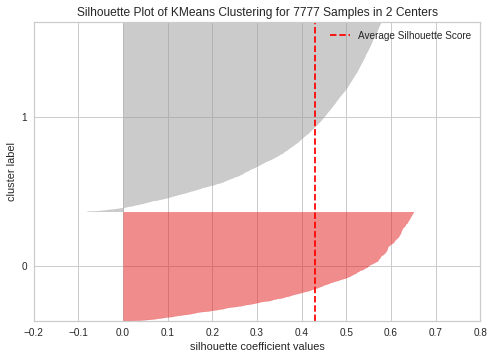

For n_clusters = 3, silhouette score is 0.47503199398230644


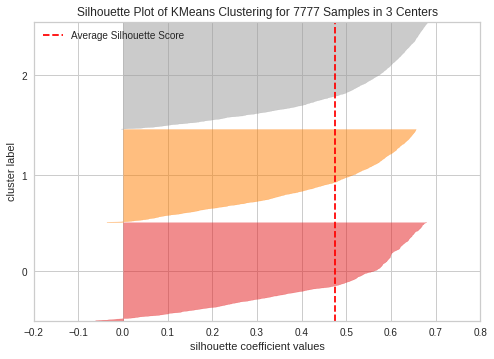

For n_clusters = 4, silhouette score is 0.44210086915395574


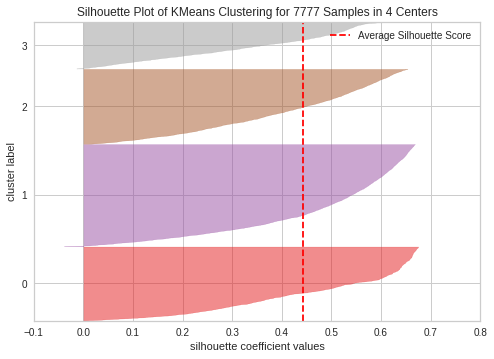

For n_clusters = 5, silhouette score is 0.4148941792290518


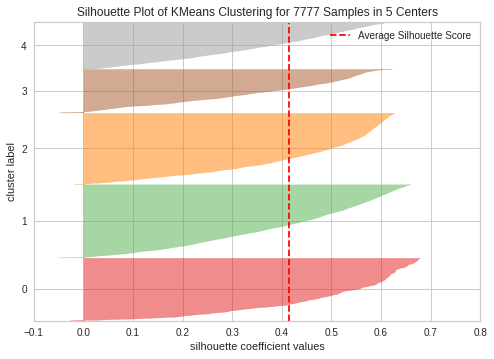

For n_clusters = 6, silhouette score is 0.40813289543439274


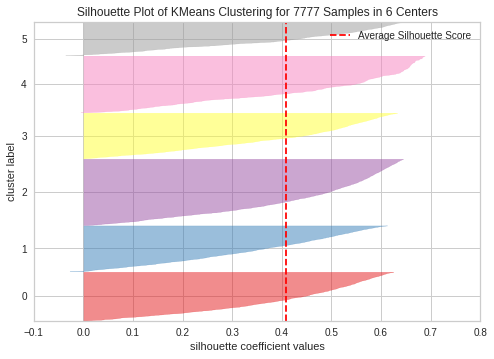

For n_clusters = 7, silhouette score is 0.3980364042039353


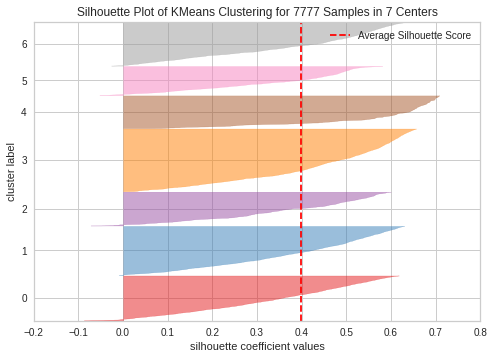

For n_clusters = 8, silhouette score is 0.3923982066514199


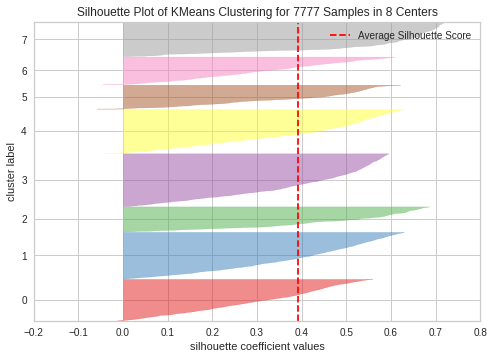

For n_clusters = 9, silhouette score is 0.387390703490312


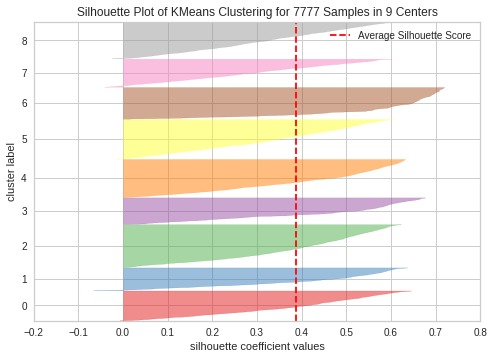

For n_clusters = 10, silhouette score is 0.38401497567070664


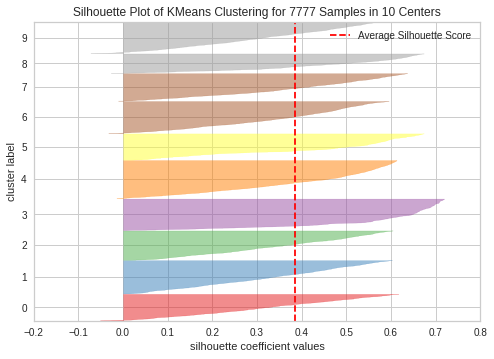

In [ ]:
silhouette_score_analysis(10)

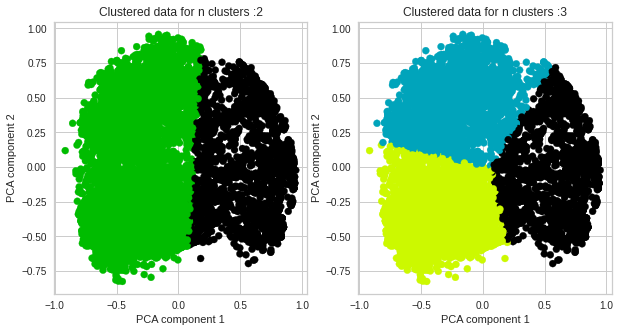

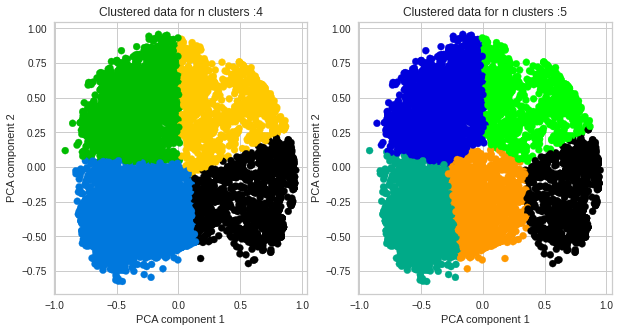

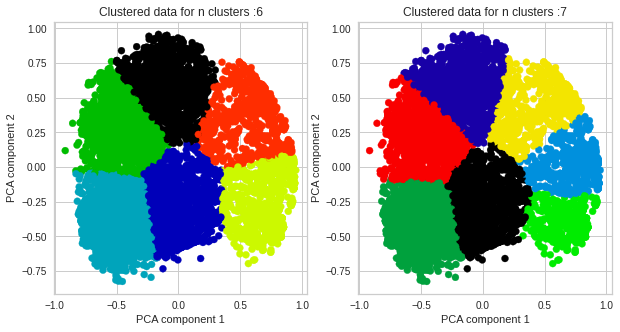

In [ ]:
import matplotlib.cm as cm

clusters(2,3)
clusters(4,5)
clusters(6,7)


Text(0, 0.5, 'size')

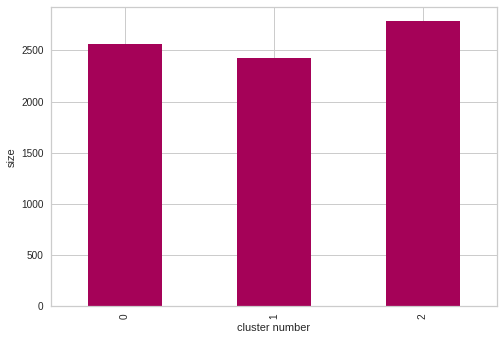

In [ ]:
combined_data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'Action & Adventure', 'Anime', 'Children & Family',
       'Classic', 'Comedy', 'Crime', 'Documentaries', 'Horror', 'Romantic',
       'Science', 'Thriller', 'Drama', 'Season_wise_content', 'cluster'],
      dtype='object')

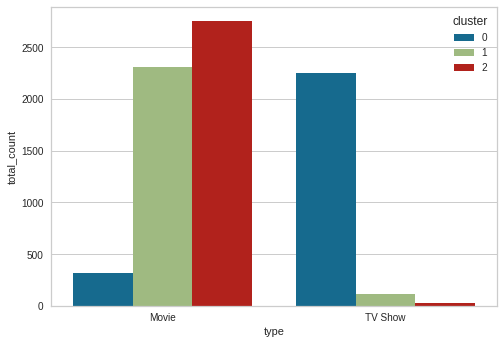

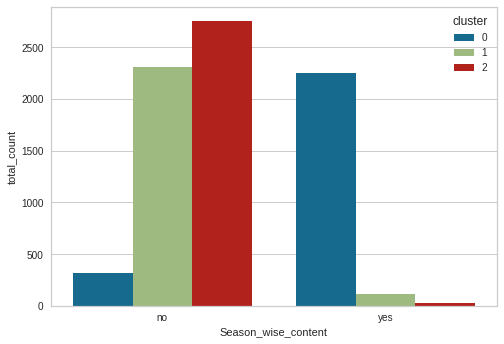

In [ ]:
cluster_analysis(combined_data,'Season_wise_content')

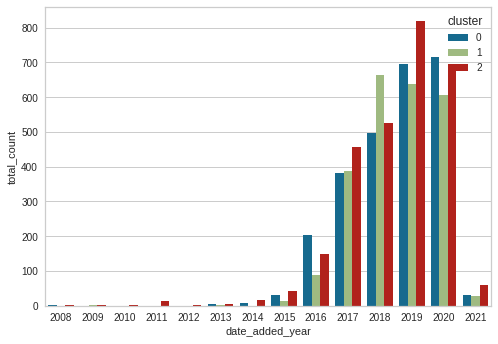

In [ ]:
cluster_analysis(combined_data,'date_added_year')

In [ ]:
cluster_analysis(combined_data,'')

In [ ]:
pca=PCA(n_components=2)
netflix_pca=pd.DataFrame(pca.fit_transform(Clus_dataSet))  
'''def silhouette_score_gaussian(n):

  for n_clusters in range(2,n+1):
      gmm = GaussianMixture(n_components=n_clusters, random_state=42)
      preds = gmm.fit_predict(netflix_pca)
      score = silhouette_score(netflix_pca, preds)
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
      visualizer = SilhouetteVisualizer(gmm)
      visualizer.fit(Clus_dataSet) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data'''

'def silhouette_score_gaussian(n):\n\n  for n_clusters in range(2,n+1):\n      gmm = GaussianMixture(n_components=n_clusters, random_state=42)\n      preds = gmm.fit_predict(netflix_pca)\n      score = silhouette_score(netflix_pca, preds)\n      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))\n      visualizer = SilhouetteVisualizer(gmm)\n      visualizer.fit(Clus_dataSet) # Fit the training data to the visualizer\n      visualizer.poof() # Draw/show/poof the data'

In [ ]:
def diag_silhouette_gaussian(n):
  for n_clusters in range(2,n+1):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(netflix_pca)
    labels = gmm.fit_predict(netflix_pca)
    score = silhouette_score(netflix_pca, labels)
    #print ("For n_clusters = {}, silhouette score is {}".format(n_clusters1, score))
    silhouette_avg = silhouette_score(netflix_pca,labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(netflix_pca,labels)
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(netflix_pca) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

For n_clusters = 2 The average silhouette_score is : 0.4312692180759667
For n_clusters = 3 The average silhouette_score is : 0.46807048338993723
For n_clusters = 4 The average silhouette_score is : 0.3994123519418372
For n_clusters = 5 The average silhouette_score is : 0.39888167729673013
For n_clusters = 6 The average silhouette_score is : 0.4004766201838674
For n_clusters = 7 The average silhouette_score is : 0.38913510941365215


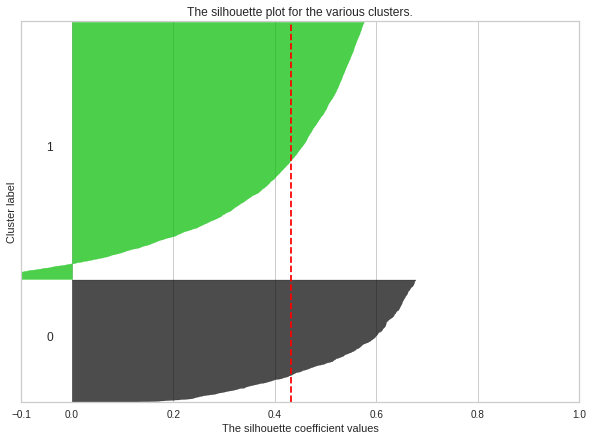

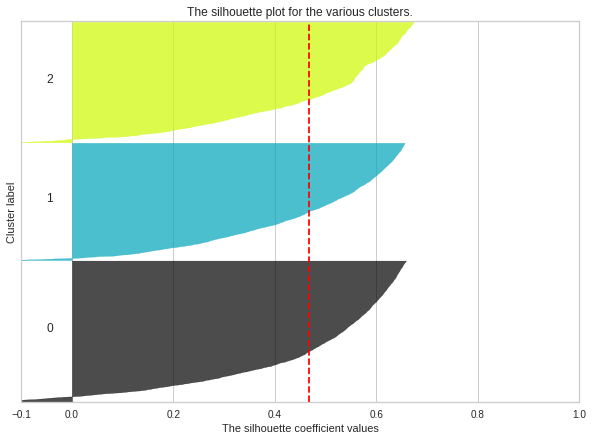

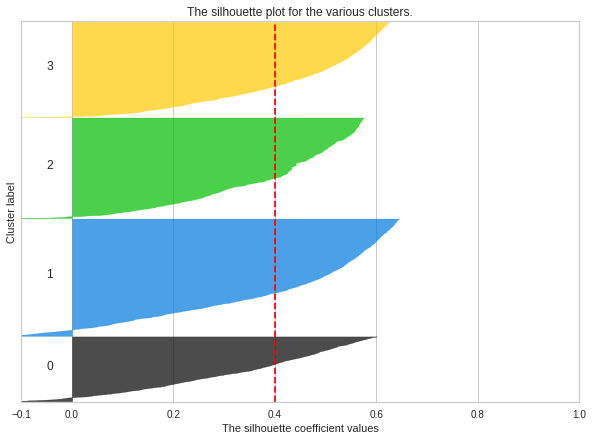

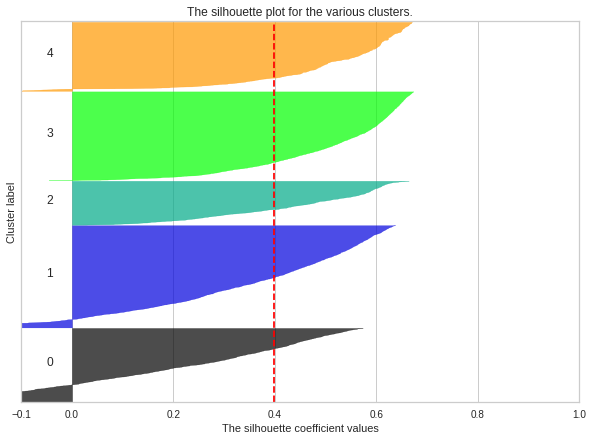

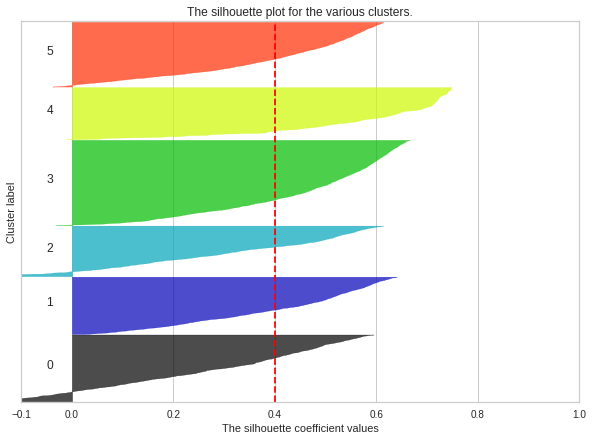

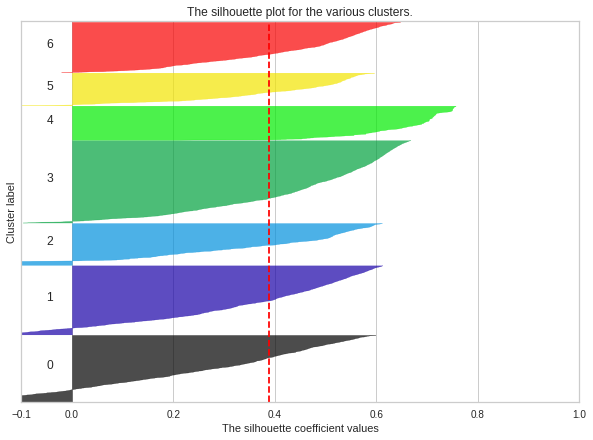

In [ ]:
diag_silhouette_gaussian(7)

In [ ]:
def clusters_gaussian(n_cluster1,n_cluster2):

  pca=PCA(n_components=2)
  netflix_pca=pd.DataFrame(pca.fit_transform(Clus_dataSet))  
  gmm = GaussianMixture(n_components=n_cluster1,n_init=20,init_params='kmeans')
  gmm.fit(netflix_pca)
  labels = gmm.predict(netflix_pca)  
  colors = cm.nipy_spectral(labels.astype(float) / n_cluster1)
  fig, ax = plt.subplots(1,2, figsize=(10,5))
  ax[0].scatter(netflix_pca[0], netflix_pca[1], c=colors)
  ax[0].set_title("Clustered data using gaussian mixtures for n clusters :"+str(n_cluster1))
  ax[0].set_xlabel("PCA component 1")
  ax[0].set_ylabel("PCA component 2") 
  
  gmm = GaussianMixture(n_components=n_cluster2)
  gmm.fit(netflix_pca)
  labels = gmm.predict(netflix_pca)
  colors = cm.nipy_spectral(labels.astype(float) / n_cluster2)
  ax[1].scatter(netflix_pca[0], netflix_pca[1], c=colors)
  ax[1].set_title("Clustered data using gaussian mixtures for n clusters :"+str(n_cluster2))
  ax[1].set_xlabel("PCA component 1")
  ax[1].set_ylabel("PCA component 2") 


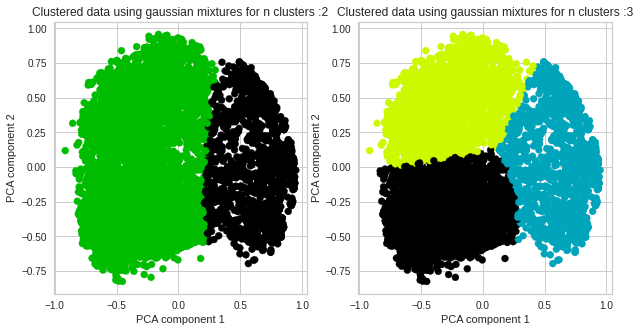

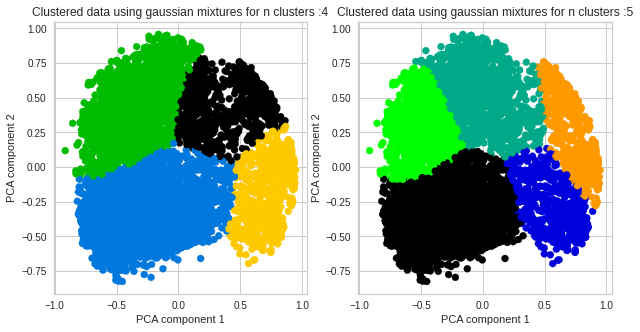

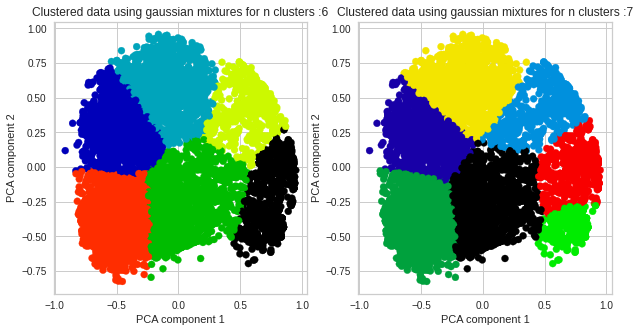

In [ ]:
clusters_gaussian(2,3)
clusters_gaussian(4,5)
clusters_gaussian(6,7)

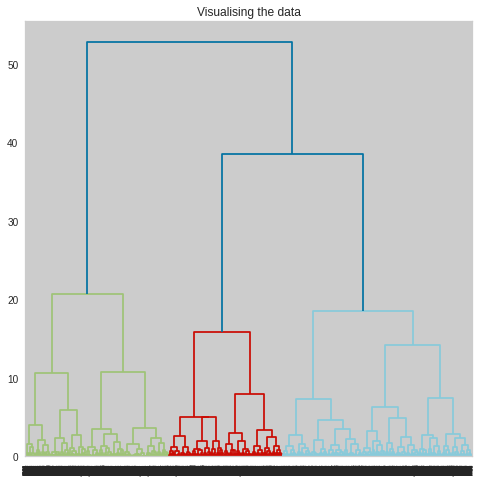

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(netflix_pca, method ='ward')))

In [ ]:
def diag_silhouette(n):
  for n_clusters in range(2,n+1):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg.fit(netflix_pca)
    labels = agg.fit_predict(netflix_pca)
    score = silhouette_score(netflix_pca, labels)
    #print ("For n_clusters = {}, silhouette score is {}".format(n_clusters1, score))
    silhouette_avg = silhouette_score(netflix_pca,labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(netflix_pca,labels)
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(netflix_pca) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

For n_clusters = 2 The average silhouette_score is : 0.41052311499351485
For n_clusters = 3 The average silhouette_score is : 0.4273473760893086
For n_clusters = 4 The average silhouette_score is : 0.39389195591501036
For n_clusters = 5 The average silhouette_score is : 0.35280252503961507
For n_clusters = 6 The average silhouette_score is : 0.34446633231837487
For n_clusters = 7 The average silhouette_score is : 0.3629658577239228


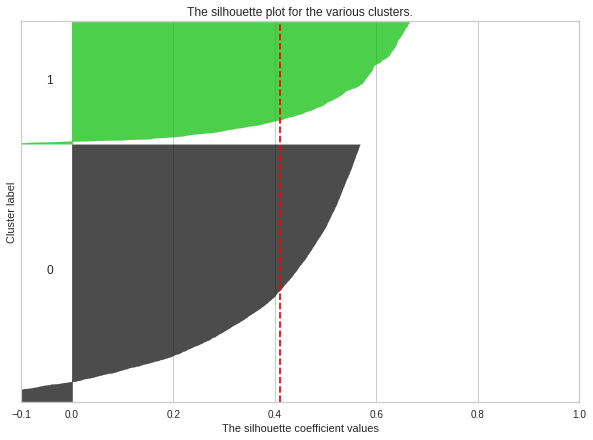

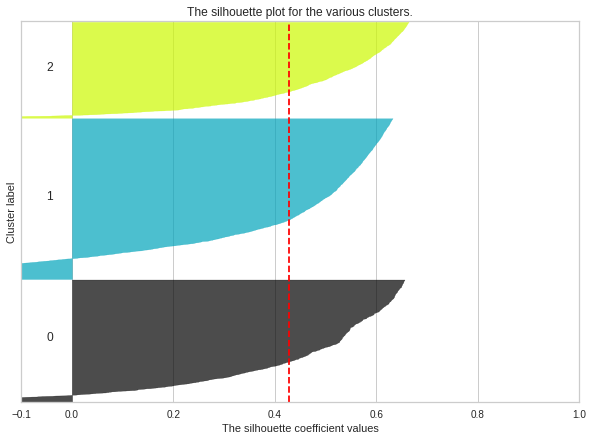

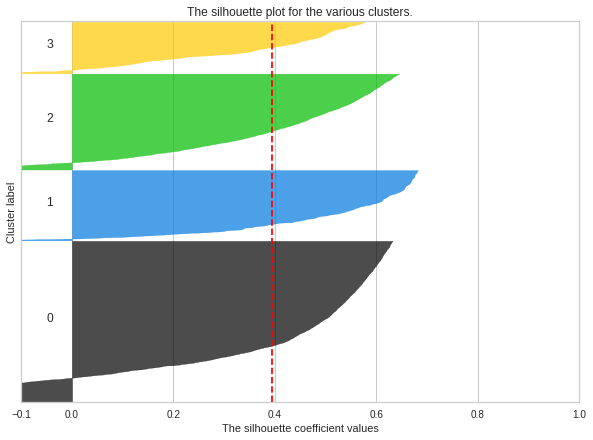

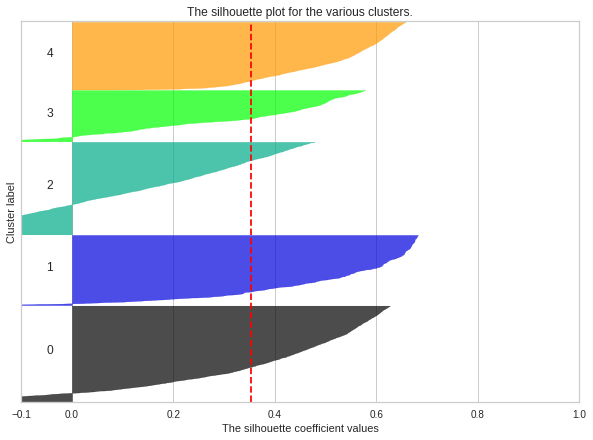

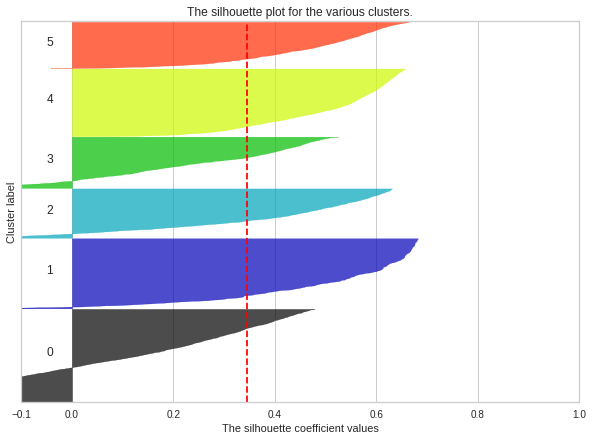

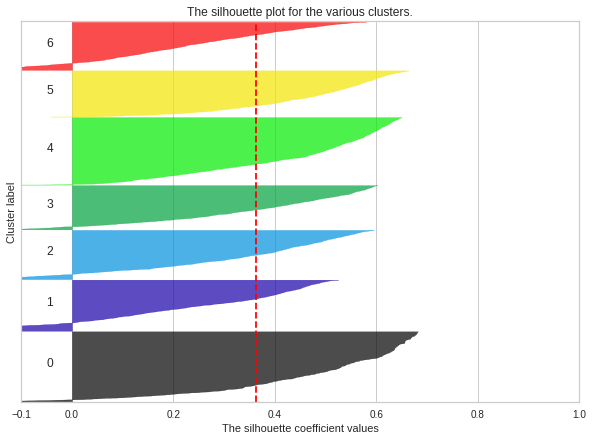

In [ ]:
diag_silhouette(7)

In [ ]:


def clusters_agglomerative(n_cluster1,n_cluster2):

  pca=PCA(n_components=2)
  netflix_pca=pd.DataFrame(pca.fit_transform(Clus_dataSet))  
  agg = AgglomerativeClustering(n_clusters=n_cluster1)
  labels = agg.fit_predict(netflix_pca)
  colors = cm.nipy_spectral(labels.astype(float) / n_cluster1)
  fig, ax = plt.subplots(1,2, figsize=(10,5))
  ax[0].scatter(netflix_pca[0], netflix_pca[1], c=colors)
  ax[0].set_title("Clustered data using gaussian mixtures for n clusters :"+str(n_cluster1))
  ax[0].set_xlabel("PCA component 1")
  ax[0].set_ylabel("PCA component 2") 
  
  agg = AgglomerativeClustering(n_clusters=n_cluster2)
  labels = agg.fit_predict(netflix_pca)
  colors = cm.nipy_spectral(labels.astype(float) / n_cluster2)
  ax[1].scatter(netflix_pca[0], netflix_pca[1], c=colors)
  ax[1].set_title("Clustered data using gaussian mixtures for n clusters :"+str(n_cluster2))
  ax[1].set_xlabel("PCA component 1")
  ax[1].set_ylabel("PCA component 2") 


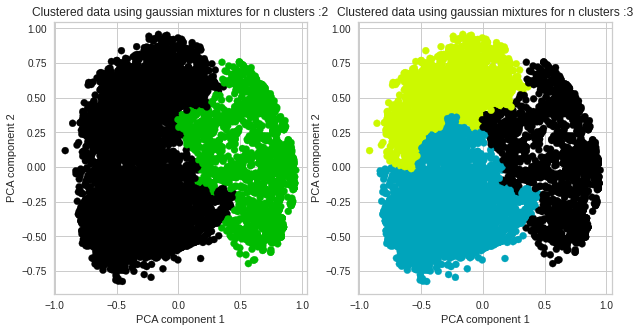

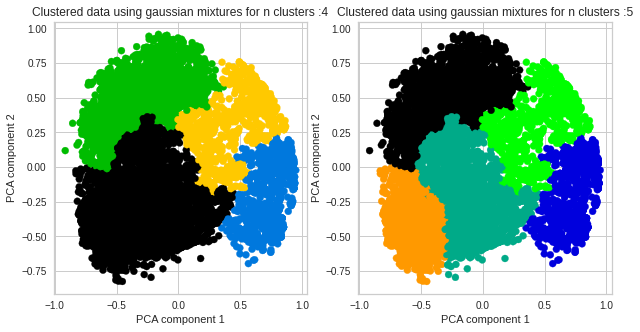

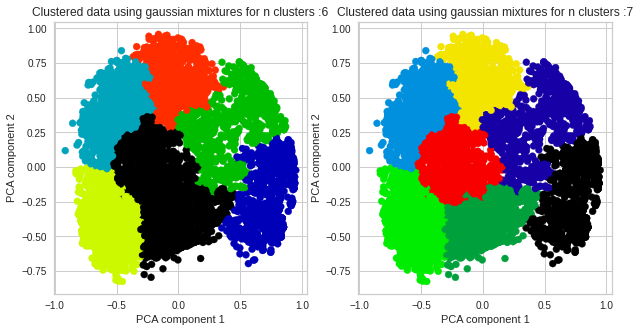

In [ ]:
clusters_agglomerative(2,3)
clusters_agglomerative(4,5)
clusters_agglomerative(6,7)

Text(0, 0.5, 'size')

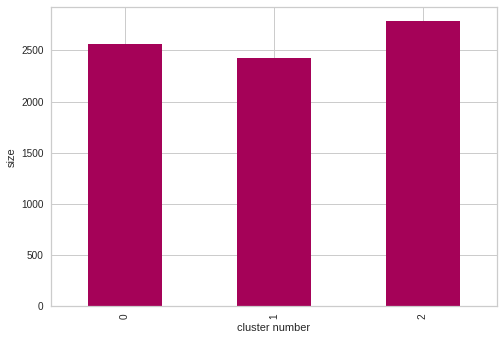

In [ ]:
netflix_pca=pd.DataFrame(pca.fit_transform(Clus_dataSet))
km = KMeans (n_clusters=3, random_state=42)
preds = km.fit_predict(netflix_pca)
labels= km.predict(netflix_pca)
df = pd.DataFrame()
df['labels'] = labels
df.labels.value_counts().sort_index().plot(kind='bar', color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

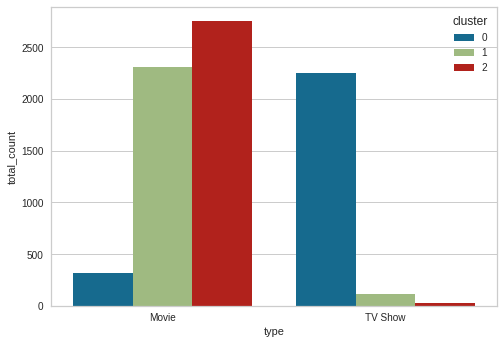

In [ ]:
combined_data = netflix_data.copy()
combined_data['cluster'] = labels
def cluster_analysis(df,col_name):
  df1 = df.groupby(['cluster',col_name]).agg(total_count=(col_name,'count'))
  df1 = df1.reset_index()
  sns.barplot(x=col_name,y="total_count", hue="cluster",data=df1)
 
cluster_analysis(combined_data,'type')

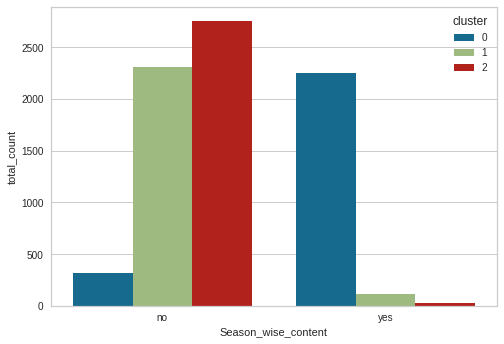

In [ ]:
cluster_analysis(combined_data,'Season_wise_content')

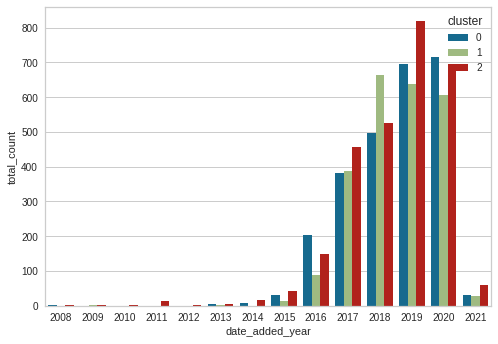

In [ ]:
cluster_analysis(combined_data,'date_added_year')

In [ ]:
def cluster_analysis_genre(df,col_name):
  df =  df[df[col_name] == 1]
  df1 = df.groupby(['cluster',col_name]).agg(total_count=(col_name,'sum'))
  df1 = df1.reset_index()
  sns.barplot(x=col_name,y="total_count", hue="cluster",data=df1)
 


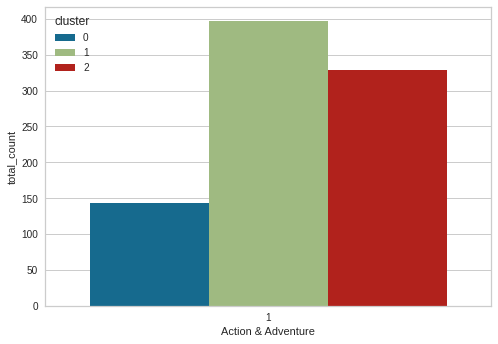

In [ ]:
cluster_analysis_genre(combined_data,'Action & Adventure')

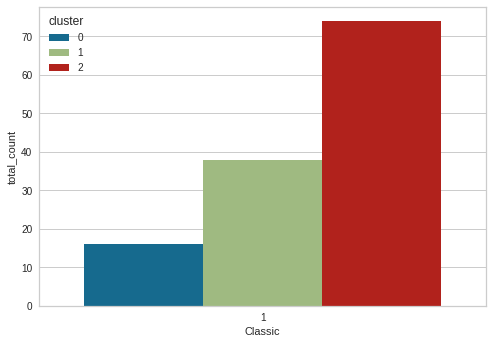

In [ ]:
cluster_analysis_genre(combined_data,'Classic')

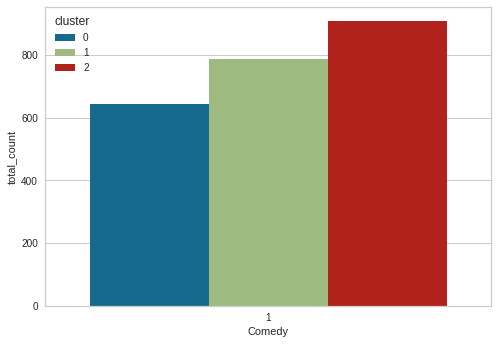

In [ ]:
cluster_analysis_genre(combined_data,'Comedy')

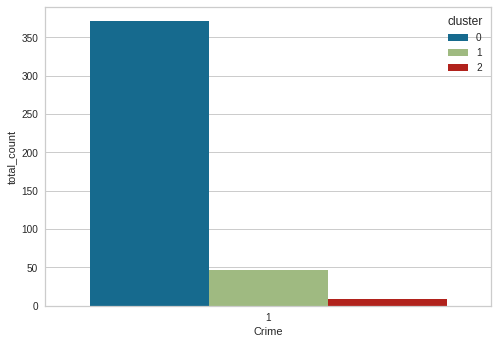

In [ ]:
cluster_analysis_genre(combined_data,'Crime')

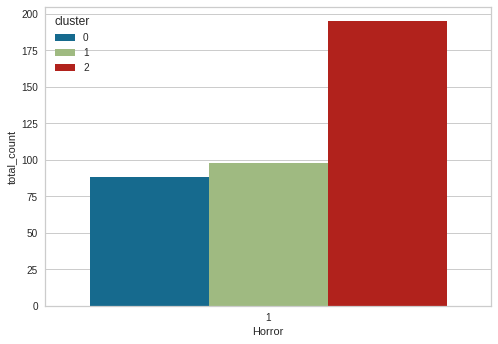

In [ ]:
cluster_analysis_genre(combined_data,'Horror')

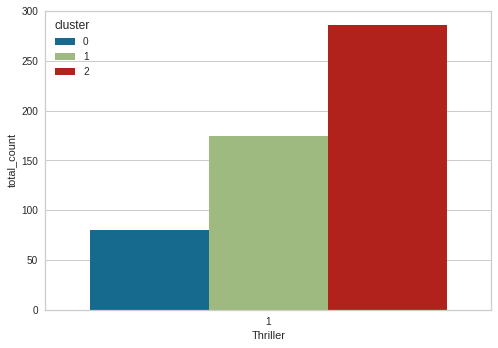

In [ ]:
cluster_analysis_genre(combined_data,'Thriller')

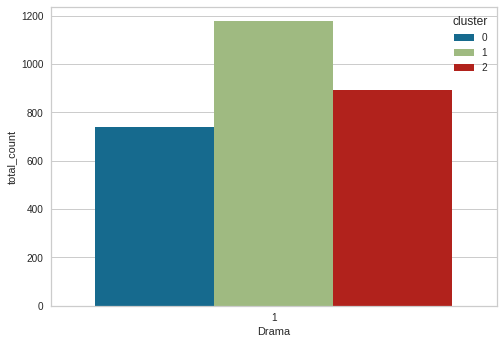

In [ ]:
cluster_analysis_genre(combined_data,'Drama')

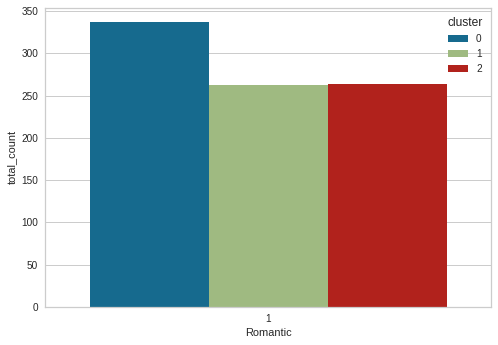

In [ ]:
cluster_analysis_genre(combined_data,'Romantic')

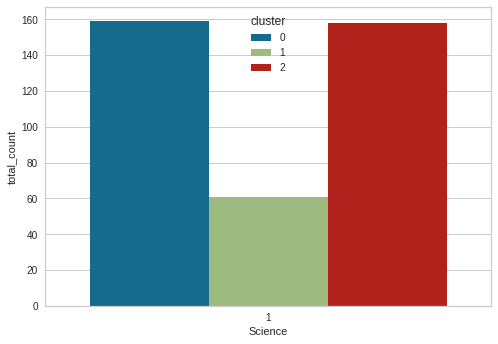

In [ ]:
cluster_analysis_genre(combined_data,'Science')

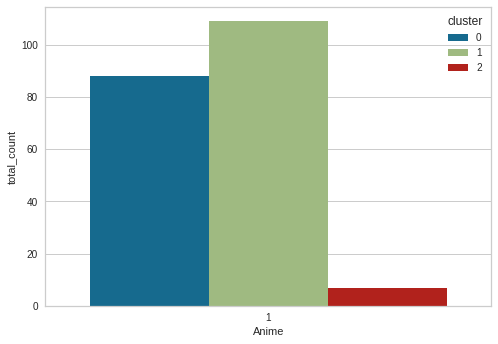

In [ ]:
cluster_analysis_genre(combined_data,'Anime')